## Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn

## Define Positional Encoding Function

In [2]:
def positional_encoding(seq_len, embed_dim):
    pos = np.arange(seq_len)[:, np.newaxis]
    i = np.arange(embed_dim)[np.newaxis, :]
    angle_rates = 1 / np.power(10000, (2 * (i // 2)) / np.float32(embed_dim))
    angle_rads = pos * angle_rates

    # Apply sine to even indices and cosine to odd indices
    pos_encoding = np.zeros(angle_rads.shape)
    pos_encoding[:, 0::2] = np.sin(angle_rads[:, 0::2])
    pos_encoding[:, 1::2] = np.cos(angle_rads[:, 1::2])
    return pos_encoding

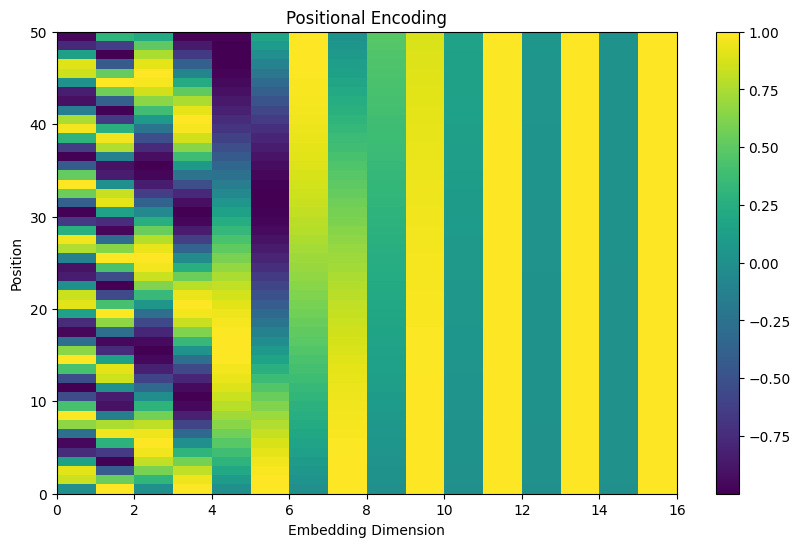

In [3]:
# Generate position encoding
seq_len = 50
embed_dim = 16
pos_encoding = positional_encoding(seq_len, embed_dim)

# Visualize positional encoding
plt.figure(figsize=(10,6))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.colorbar()
plt.title("Positional Encoding")
plt.xlabel("Embedding Dimension")
plt.ylabel("Position")
plt.show()

## Defining Main Function

In [4]:
class TransformerWithPositionalEncoding(nn.Module):
    def __init__(self, embed_dim, seq_len, num_heads, ff_dim):
        super(TransformerWithPositionalEncoding, self).__init__()
        self.embedding = nn.Embedding(seq_len, embed_dim)
        self.positional_encoding = nn.Parameter(torch.tensor(positional_encoding(seq_len, embed_dim), dtype=torch.float32))
        self.multihead_attention = nn.MultiheadAttention(embed_dim, num_heads)
        self.ffn = nn.Sequential(
            nn.Linear(embed_dim, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, embed_dim)
        )
        self.norm1 = nn.LayerNorm(embed_dim)
        self.norm2 = nn.LayerNorm(embed_dim)

    def forward(self, x):
        # Add Positional encoding to embedding
        x = self.embedding(x) + self.positional_encoding
        # Self Attention
        attn_output, _ = self.multihead_attention(x, x, x)
        x = self.norm1(x + attn_output)
        # Feed Forward Network
        ffn_output = self.ffn(x)
        x = self.norm2(x + ffn_output)
        return x

In [5]:
# Define model paramteres
embed_dim = 16
seq_len = 50
num_heads = 4
ff_dim = 64

model = TransformerWithPositionalEncoding(embed_dim, seq_len, num_heads, ff_dim)
print(model)

TransformerWithPositionalEncoding(
  (embedding): Embedding(50, 16)
  (multihead_attention): MultiheadAttention(
    (out_proj): NonDynamicallyQuantizableLinear(in_features=16, out_features=16, bias=True)
  )
  (ffn): Sequential(
    (0): Linear(in_features=16, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=16, bias=True)
  )
  (norm1): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
  (norm2): LayerNorm((16,), eps=1e-05, elementwise_affine=True)
)


In [6]:
# Learnable positional encoding
class LearnablePositionalEncoding(nn.Module):
    def __init__(self, seq_len, embed_dim):
        super(LearnablePositionalEncoding, self).__init__()
        self.positional_encoding = nn.Parameter(torch.zeros(seq_len, embed_dim))

    def forward(self, x):
        return x + self.positional_encoding

learnable_pe = LearnablePositionalEncoding(seq_len, embed_dim)
print(learnable_pe)

LearnablePositionalEncoding()
